## Shrinkage Methods : L2 (Ridge) and L1 (Lasso) regularization for multivariate linear regression

Last week, you observed the effects of overfitting of given data because of high model complexity on "data_poly1.npz" and "data_poly2.npz". You saw how overfitting occured due to the least squares regression model describing random errors or noise in the data instead of the underlying distribution thus causing an increase in test error. (although the training error reduced with increasing complexity). This week we will explore the two main explanations of the overfitting phenomenon :
- High model complexity
- Multicollinearity of predictors

Then we will go on to look at the two most widely used techniques to reduce overfitting of data on using linear regression models: Ridge and Lasso regression.

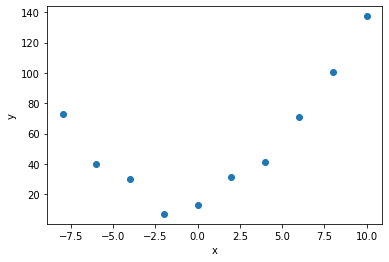

In [25]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")

#Loading data
with np.load("./data_poly1.npz") as data:
    x = data['x']
    y = data['y']
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Overfitting of data due to high model complexity

#### Ridge regression
Last week you fit a $9$th order polynomial to the given dataset "data_poly1.npz" containing 10 distinct points. The polynomial fit all the data points exactly and thus wrongly modelled the noise too. 
- Now use polynomial regression of order 9 along with L2 norm regularization (Ridge regression) on "data_poly1.npz" for $\lambda=0, 0.1, 1, 10$ and $100$ and plot the true vs predicted values for each $\lambda$. 

The parameters are([x,x2,x3,x4...]):[ 9.64173973e+00  1.77416836e+00 -1.02695212e+00 -2.26511471e-02
  4.05873984e-02  1.45203333e-04 -5.81826023e-04  9.19546836e-07
  2.62670437e-06]
 Intercept:12.588403762481207
Train MSE for lamda=0 is :1.248941170981937e-19


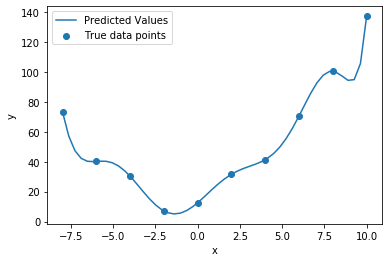

The parameters are([x,x2,x3,x4...]):[ 9.24808919e+00  1.67088652e+00 -9.66303176e-01 -1.24746404e-02
  3.76137505e-02 -1.54486758e-04 -5.23569740e-04  3.50265925e-06
  2.23457966e-06]
 Intercept:12.74383915685901
Train MSE for lamda=0.1 is :0.038719316145859016


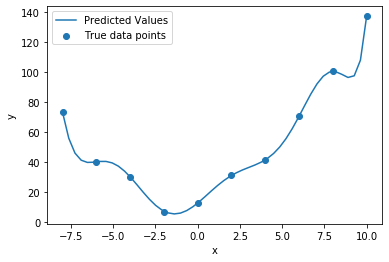

The parameters are([x,x2,x3,x4...]):[ 6.77676594e+00  1.05644246e+00 -5.88291411e-01  4.82454097e-02
  1.92386092e-02 -1.94509012e-03 -1.66598639e-04  1.89472562e-05
 -1.51450766e-07]
 Intercept:13.661634892355806
Train MSE for lamda=1 is :2.042853957209169


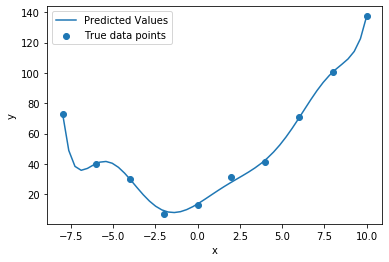

The parameters are([x,x2,x3,x4...]):[ 1.89922720e+00  1.55257573e-01  1.30316443e-01  1.38740227e-01
 -1.41792535e-02 -4.63352824e-03  4.54195706e-04  4.22241904e-05
 -4.14282516e-06]
 Intercept:14.95226071544272
Train MSE for lamda=10 is :14.782136803675645


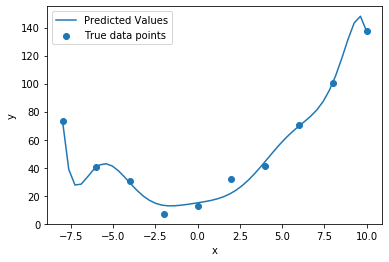

The parameters are([x,x2,x3,x4...]):[ 2.72495192e-01  4.23877135e-02  3.17292049e-01  1.46746002e-01
 -2.11492029e-02 -4.82793483e-03  5.57867347e-04  4.37193496e-05
 -4.67743202e-06]
 Intercept:15.251335784551884
Train MSE for lamda=100 is :21.73773641656506


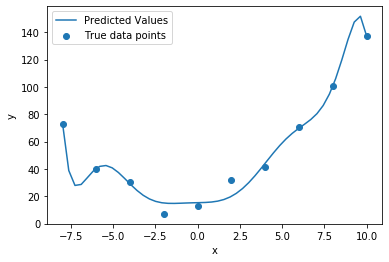

In [4]:
#Suggested degree = 9 
degree = 9
#Generating quadratic features [1,x,x^2]
poly = PolynomialFeatures(degree)
x_poly=poly.fit_transform(x.reshape(-1,1))
x_poly=x_poly[:,1:]
#Set of lamdas
lambda_set = [0,0.1,1,10,100]

for lamda in lambda_set:
    #Fitting using Ridge regression
    reg = Ridge(alpha=lamda).fit(x_poly, y)
    coefficients = reg.coef_.copy()
#     coefficients[0] = reg.intercept_
    print("The parameters are([x,x2,x3,x4...]):{}\n Intercept:{}".format(coefficients,reg.intercept_))
    #MSE
    y_pred = reg.predict(x_poly)
    print("Train MSE for lamda={} is :{}".format(lamda,np.mean((y-y_pred)**2)))
    #Plot
    x_plot = np.linspace(start=max(x),stop=min(x),num=50)
    x_plot_poly=poly.fit_transform(x_plot.reshape(-1,1))
    x_plot_poly=x_plot_poly[:,1:]
    y_plot = reg.predict(x_plot_poly)
    #data points
    plt.scatter(x,y)
    #Fitted line
    plt.plot(x_plot,y_plot)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(["Predicted Values","True data points"])
    plt.show()

#### Lasso regression
- Now use polynomial regression of order 9 along with L1 norm regularization (Lasso regression) on "data_poly1.npz" for $\lambda=0, 0.1, 1, 10$ and $100$ and plot the true vs predicted values for each $\lambda$. 

The parameters are([x,x2,x3,x4...]):[ 3.47120232e+00  1.32274203e+00 -6.15197630e-02 -4.69460841e-03
  8.59544877e-04 -7.31975073e-06 -1.61089581e-06  5.43039962e-07
 -5.22986608e-08]
 Intercept:14.189087433340426
Train MSE for lamda=0 is :14.020586503739077


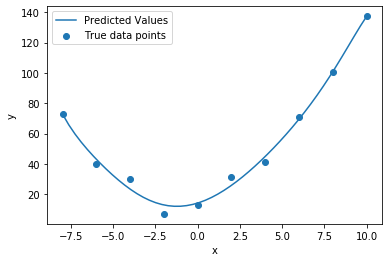

The parameters are([x,x2,x3,x4...]):[ 3.38818942e+00  1.32515649e+00 -5.73430139e-02 -4.85935823e-03
  8.12802418e-04 -5.62601930e-06 -1.63953421e-06  5.47718878e-07
 -5.14461404e-08]
 Intercept:14.195013822659597
Train MSE for lamda=0.1 is :14.05407031838746


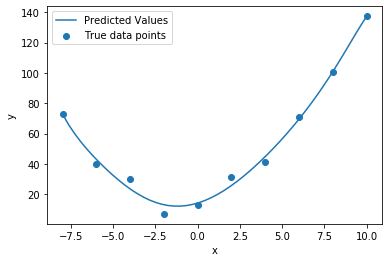

The parameters are([x,x2,x3,x4...]):[ 2.64106725e+00  1.34685130e+00 -1.97493051e-02 -6.34041980e-03
  3.91975873e-04  9.59605242e-06 -1.89550628e-06  5.89880398e-07
 -4.37767205e-08]
 Intercept:14.248454481915239
Train MSE for lamda=1 is :14.966124058540936


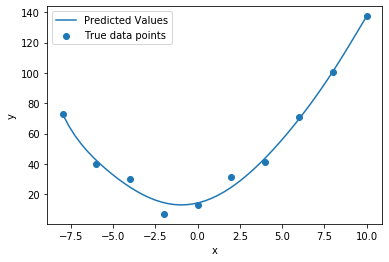

The parameters are([x,x2,x3,x4...]):[ 0.00000000e+00  1.03187181e+00  1.28394019e-01  3.18548113e-04
 -1.77050314e-03 -2.99861485e-06  9.98173996e-07  2.51026738e-07
  3.08974216e-08]
 Intercept:16.537561336390667
Train MSE for lamda=10 is :29.534360370594886


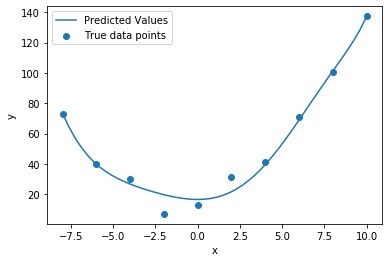

The parameters are([x,x2,x3,x4...]):[ 0.00000000e+00  0.00000000e+00  1.04799722e-01  3.34391800e-02
 -1.92535533e-03 -2.42172658e-04  5.76404553e-06 -4.20916804e-07
  9.51020422e-08]
 Intercept:21.79959000953344
Train MSE for lamda=100 is :52.35939977968993


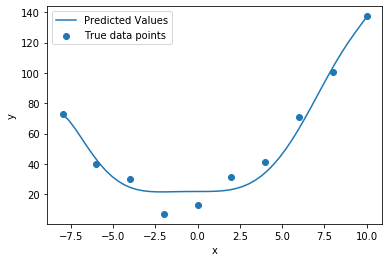

In [5]:
#Suggested degree = 9 
degree = 9
#Generating quadratic features [1,x,x^2]
poly = PolynomialFeatures(degree)
x_poly=poly.fit_transform(x.reshape(-1,1))
x_poly=x_poly[:,1:]
#Set of lamdas
lambda_set = [0,0.1,1,10,100]

for lamda in lambda_set:
    #Fitting using Ridge regression
    reg = Lasso(alpha=lamda).fit(x_poly, y)
    coefficients = reg.coef_.copy()
#     coefficients[0] = reg.intercept_
    print("The parameters are([x,x2,x3,x4...]):{}\n Intercept:{}".format(coefficients,reg.intercept_))
    #MSE
    y_pred = reg.predict(x_poly)
    print("Train MSE for lamda={} is :{}".format(lamda,np.mean((y-y_pred)**2)))
    #Plot
    x_plot = np.linspace(start=max(x),stop=min(x),num=50)
    x_plot_poly=poly.fit_transform(x_plot.reshape(-1,1))
    x_plot_poly=x_plot_poly[:,1:]
    y_plot = reg.predict(x_plot_poly)
    #data points
    plt.scatter(x,y)
    #Fitted line
    plt.plot(x_plot,y_plot)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(["Predicted Values","True data points"])
    plt.show()

Plot the training and validation set ("data_poly2.npz") mean square errors vs $\lambda$ for ridge and lasso regression. Compare with least squares polynomial regression of order $9$ from the previous week.  

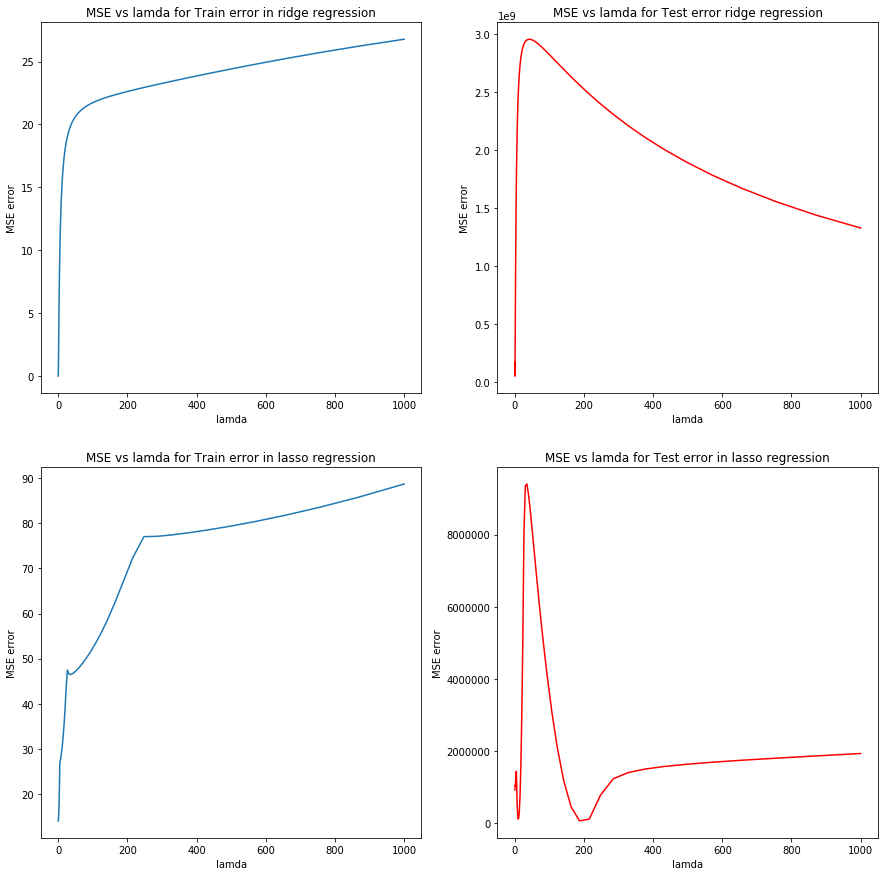

In [9]:
#Loading data
with np.load("./data_poly2.npz") as data:
    x_test = data['x']
    y_test = data['y']

# Training and validation MSE vs lambda for rigde and Lasso regression
lambda_set = np.logspace(-3,3,100)
mse_list_test_ridge = []
mse_list_train_ridge = []
mse_list_test_lasso = []
mse_list_train_lasso = []

#Generating polynomial features 
degree = 9
poly = PolynomialFeatures(degree)
x_poly=poly.fit_transform(x.reshape(-1,1))
x_poly=x_poly[:,1:]
x_poly_test=poly.fit_transform(x_test.reshape(-1,1))
x_poly_test=x_poly_test[:,1:]

for lamda in lambda_set:
    #Fitting using linear regression
    reg_lasso = Lasso(alpha = lamda).fit(x_poly, y)
    reg_ridge = Ridge(alpha = lamda).fit(x_poly, y)
    #Prediction
    y_pred_test_lasso = reg_lasso.predict(x_poly_test)
    y_pred_train_lasso = reg_lasso.predict(x_poly)
    y_pred_test_ridge = reg_ridge.predict(x_poly_test)
    y_pred_train_ridge = reg_ridge.predict(x_poly)
    #MSE and storing it in a list
    mse_list_test_lasso.append(np.mean((y_test-y_pred_test_lasso)**2))
    mse_list_train_lasso.append(np.mean((y-y_pred_train_lasso)**2)) 
    mse_list_test_ridge.append(np.mean((y_test-y_pred_test_ridge)**2))
    mse_list_train_ridge.append(np.mean((y-y_pred_train_ridge)**2)) 

#plotting
fig = plt.figure(figsize = [15,15])
#Ridge regression plot for train
plt.subplot(2, 2, 1)
plt.plot(lambda_set,mse_list_train_ridge)
plt.title("MSE vs lamda for Train error in ridge regression")
plt.xlabel("lamda")
plt.ylabel("MSE error")

#Ridge regression plot for validation
plt.subplot(2, 2, 2)
plt.plot(lambda_set,mse_list_test_ridge,color="red")
plt.title("MSE vs lamda for Test error ridge regression")
plt.xlabel("lamda")
plt.ylabel("MSE error")

#Lasso regression plot for train
plt.subplot(2, 2, 3)
plt.plot(lambda_set,mse_list_train_lasso)
plt.title("MSE vs lamda for Train error in lasso regression")
plt.xlabel("lamda")
plt.ylabel("MSE error")

#Lasso regression plot for validation
plt.subplot(2, 2, 4)
plt.plot(lambda_set,mse_list_test_lasso,color="red")
plt.title("MSE vs lamda for Test error in lasso regression")
plt.xlabel("lamda")
plt.ylabel("MSE error")

plt.show()

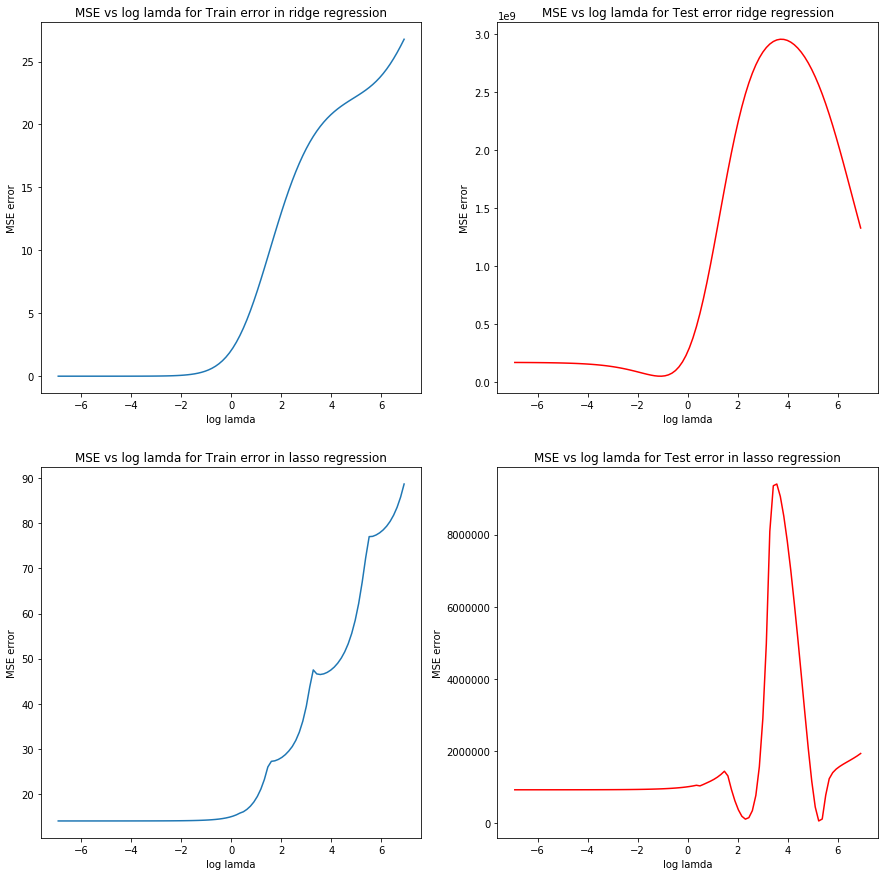

In [10]:
#plotting
fig = plt.figure(figsize = [15,15])

#Ridge regression plot for train
plt.subplot(2, 2, 1)
plt.plot(np.log(lambda_set),mse_list_train_ridge)
plt.title("MSE vs log lamda for Train error in ridge regression")
plt.xlabel("log lamda")
plt.ylabel("MSE error")

#Ridge regression plot for validation
plt.subplot(2, 2, 2)
plt.plot(np.log(lambda_set),mse_list_test_ridge,color="red")
plt.title("MSE vs log lamda for Test error ridge regression")
plt.xlabel("log lamda")
plt.ylabel("MSE error")

#Lasso regression plot for train
plt.subplot(2, 2, 3)
plt.plot(np.log(lambda_set),mse_list_train_lasso)
plt.title("MSE vs log lamda for Train error in lasso regression")
plt.xlabel("log lamda")
plt.ylabel("MSE error")

#Lasso regression plot for validation
plt.subplot(2, 2, 4)
plt.plot(np.log(lambda_set),mse_list_test_lasso,color="red")
plt.title("MSE vs log lamda for Test error in lasso regression")
plt.xlabel("log lamda")
plt.ylabel("MSE error")

plt.show()

From previous week without any regularization we saw that,the 9 degree polynomial was severly overfitting with test error being greater than 10^15. With regularization such as Ridge or Lasso, we are able to limit the loss to 10^8 for ridge and 66431 for lasso hence regularization prevents overfitting

In [11]:
min(mse_list_test_lasso)

66431.23111217497

#### Observations and inferences:
- Explain how the variances of the least squares estimates vary as the number of features increase. Comment for the following three cases :
 - n>>p
 - n~p
 - n<p

n : number of data points <br>
p : number of features <br>
- Why do ridge and lasso regression improve over least squares regression? Make arguments based on the training and validation set error plots.
- What can you say about the model complexity as $\lambda$ increases?

--------------------------------------------------------------------------------------------------------------------
# Q1
1) n>>p<br>
   The varaince of the least squares estimates are the least among the other two cases, this is beacause the            covariance matrix which is used in linear regression becomes more stable with high n compared to p<br>
2) n=p<br>
   This leads to high variance in the least squares estimates as now the curve perfectly tries to fit the points as    n~p(3rd degree polynomial fits 4 points perfectly). This causes severe overfitting<br>
3) n less than p <br>
   We cant get least squares estimates for this example as n<p<br>
<br>
# Q2
Ridge and Lasso regression improves over least squares regression as it penalizes the weights of the features. This prevents overfitting as now it will try to optimize loss which now has a penalty term attached to it. As we can see from the log lamda plot, by penalizing for weights of large number of features we are able to generalize better in the test set, even though our training error increases(due to penalty term)
<br><br>
# Q3
As lamda increases the model becomes very simple and as lambda goes to 0 the model becomes really complex

### Overfitting of data due to multicollinearity

The coefficient estimates of least squares regression can also change erratically in responses to small changes in data when the predictors are highly correlated. 

#### Uncorrelated features
The three columns of $X$ contain the three features. $Y$ is generated as a linear combination of two features as shown. 
- Compute the correlations between the features.
- Fit a linear regression, lasso ($\lambda=0.1$) and ridge ($\lambda=10$) regression model and compare the coefficients with the expected coefficients. 
- Does the linear regression model recover the underlying structure of the data? (despite significant noise in the data)
- How often do you think that real life datasets have uncorrelated features? 
- Which of the two methods (ridge and lasso regression) performs feature selection? Which model results in sparser weights?



In [27]:
import numpy as np

np.random.seed(0)
size = 5000
X = np.random.normal(0, 1, (size, 3))
#Y = X0 + 2*X1 + noise
#X0,X1 and X2 are the features
Y = X[:,0] + 2*X[:,1] + np.random.normal(0, 2, size)

#Correlation between the features of X
print("Correlation between X1 and X2:{}\nCorrelation between X2 and X3:{}\nCorrelation between X3 and X1:{}\n".format(np.corrcoef(X.T)[0,1],np.corrcoef(X.T)[1,2],np.corrcoef(X.T)[2,0]))

#Linear regression
model = LinearRegression().fit(X,Y)
coefficients = model.coef_.copy()
print("The equation for Linear is :Y = {}*X1 + {}*X2 + {}*X3 + {}".format(coefficients[0],coefficients[1],coefficients[2],model.intercept_))

#Lasso regreesion
model = Lasso(alpha=0.1).fit(X, Y)
coefficients = model.coef_.copy()
print("The equation for Lasso is :Y = {}*X1 + {}*X2 + {}*X3 + {}".format(coefficients[0],coefficients[1],coefficients[2],model.intercept_))

#Ridge regreesion
model = Ridge(alpha=10).fit(X, Y)
coefficients = model.coef_.copy()
print("The equation  for Ridge is :Y = {}*X1 + {}*X2 + {}*X3 + {}".format(coefficients[0],coefficients[1],coefficients[2],model.intercept_))

Correlation between X1 and X2:0.015683310933094906
Correlation between X2 and X3:0.013734008951982042
Correlation between X3 and X1:-0.012066248700035266

The equation for Linear is :Y = 0.9842287265873689*X1 + 1.9952237802913537*X2 + -0.04074316048703386*X3 + 0.03276509716688586
The equation for Lasso is :Y = 0.8855530444654456*X1 + 1.8924863623568386*X2 + -0.0*X3 + 0.029625139665575187
The equation  for Ridge is :Y = 0.9823141224547046*X1 + 1.9911213115384059*X2 + -0.0406274679251296*X3 + 0.03267709486864032


Q1) Yes both the linear regression and ridge and lasso model almost recover the underlying structure of the data. The ridge model is able to discover the coefficients better however its predicting that X3 has a role to play to determine Y. The lasso is not able to predict the coefficents as good as ridge or linear but its able to eliminate role of X3

Q2)In real life the features are almost always correlated, if not directly they will always be partially correlated.

Q3)Lasso regression performs feature selection. It does this by giving sparse weights

#### Correlated features
The three columns of $X$ contain three features. $Y$ is generated as a linear combination of the three features using 10 different random seeds as shown.
- Compute the correlations between the features.
- Fit a linear, lasso ($\lambda=0.1$) and ridge ($\lambda=10$) regression model corresponding to data generated from each random seed and compare the coefficients with the expected coefficients.
- Compare the stability of the three models. Here stability is wrt fluctuations in coefficients on minor changes in data achieved through a different random seed in each iteration.
- Do you expect lasso and ordinary linear regression models to be stable for datsets with correlated features? Explain giving reasons.

In [28]:
size = 100
ridge_coeffs = []
lasso_coeffs = []
linear_coeffs = []
#We run the method 10 times with different random seeds
for i in range(10):
    print("Random seed %s" % i)
    np.random.seed(seed=i)
    X_seed = np.random.normal(0, 1, size)
    #X0,X1 and X2 are the features
    X0 = X_seed + np.random.normal(0, .1, size)
    X1 = X_seed + np.random.normal(0, .1, size)
    X2 = X_seed + np.random.normal(0, .1, size)
    Y = X0 + X1 + X2 + np.random.normal(0, 1, size)
    X = np.array([X0, X1, X2]).T
    
    #Correlation between the features
    print("Correlation between features\n:{}\n".format(np.corrcoef(X.T)))

    #Linear regression
    model = LinearRegression().fit(X,Y)
    coefficients = model.coef_.copy()
    print("The equation for Linear is :Y = {}*X1 + {}*X2 + {}*X3 + {}".format(coefficients[0],coefficients[1],coefficients[2],model.intercept_))
    linear_coeffs.append(coefficients)
    
    #Lasso regreesion
    model = Lasso(alpha=0.1).fit(X, Y)
    coefficients = list(model.coef_.copy())
    coefficients.append(model.intercept_)
    print("The equation for Lasso is :Y = {}*X1 + {}*X2 + {}*X3 + {}\n".format(coefficients[0],coefficients[1],coefficients[2],model.intercept_))
    lasso_coeffs.append(coefficients)
    
    #Ridge regreesion
    model = Ridge(alpha=10).fit(X, Y)
    coefficients = list(model.coef_.copy())
    coefficients.append(model.intercept_)
    print("The equation  for Ridge is :Y = {}*X1 + {}*X2 + {}*X3 + {}\n".format(coefficients[0],coefficients[1],coefficients[2],model.intercept_))
    ridge_coeffs.append(coefficients)

Random seed 0
Correlation between features
:[[1.         0.99107886 0.9914997 ]
 [0.99107886 1.         0.99254973]
 [0.9914997  0.99254973 1.        ]]

The equation for Linear is :Y = 0.7284403029586467*X1 + 2.309260007055288*X2 + -0.08219169304002505*X3 + -0.021218265879105885
The equation for Lasso is :Y = 0.6834250745450534*X1 + 2.1773518960665577*X2 + 0.0*X3 + -0.014347186951183893

The equation  for Ridge is :Y = 0.9383213079633869*X1 + 1.058872772209185*X2 + 0.8765264378692514*X3 + -0.006587047642646199

Random seed 1
Correlation between features
:[[1.         0.99061655 0.98680909]
 [0.99061655 1.         0.98560791]
 [0.98680909 0.98560791 1.        ]]

The equation for Linear is :Y = 1.1518156149926146*X1 + 2.365799156612571*X2 + -0.5990086402097659*X3 + 0.06236137540614009
The equation for Lasso is :Y = 0.8535110787247918*X1 + 1.9509485061177192*X2 + 0.0*X3 + 0.07546182771892157

The equation  for Ridge is :Y = 0.9840957707884034*X1 + 1.0679267347194443*X2 + 0.7585536669537

In [29]:
ridge_matrix = np.matrix(ridge_coeffs)
lasso_matrix = np.matrix(lasso_coeffs)
linear_matrix = np.matrix(linear_coeffs)
print("Ridge_matrix: \n{}\n".format(ridge_coeffs))
print("Lasso_matrix: \n{}\n".format(lasso_coeffs))
print("Linear_matrix: \n{}\n".format(linear_coeffs))

Ridge_matrix: 
[[0.9383213079633869, 1.058872772209185, 0.8765264378692514, -0.006587047642646199], [0.9840957707884034, 1.0679267347194443, 0.7585536669537166, 0.07550789875415476], [0.9715912431801879, 0.942562022408066, 1.0853940647482487, -0.15804396404832827], [0.9189180592750569, 1.0047438573934342, 1.032765939943763, 0.057719842746719985], [0.9640162146284028, 0.9815252411148525, 1.098359901490962, 0.04183457418836811], [0.7581986438386599, 1.010858039036464, 1.1390417014651426, -0.03493246032389108], [1.016165072136217, 0.890322378887858, 1.090738602916511, -0.08456541233789716], [1.0179375989183794, 1.0386551382863374, 0.900823728697625, -0.12531628563131256], [0.9068583405259385, 1.0711975184451887, 1.008379937115892, 0.03404964507242417], [0.8961717825779789, 0.9034086609133406, 0.9801595784428756, 0.044465879040876274]]

Lasso_matrix: 
[[0.6834250745450534, 2.1773518960665577, 0.0, -0.014347186951183893], [0.8535110787247918, 1.9509485061177192, 0.0, 0.07546182771892157], [

Q2) The coefficients of real true equation is not at all matching for both Lasso and Linear, however we can some time there is a   match for ridge regression though not accurate.   
Q3) Both linear and lasso  models are highly unstable. Ridge is also slighlty unstable although not as high as linear and lasso models  
Q4)No both lasso and linear models wont be stable at all for datasets with highly correlated variables. The linear model wont work well due to non-invertibilty of (X'*X) which occurs in the estimation of weights. The lasso regression also wont work well as it tries to find sparse weights. Since the variables are correlated we can have multiple realizations of sparse weights which causes lasso regression to not perform well  